In [1]:
import numpy as np
import os
import matplotlib
import pickle 

matplotlib.rcParams["axes.linewidth"] = 0.75
matplotlib.rcParams["grid.linewidth"] = 0.75
matplotlib.rcParams["lines.linewidth"] = 0.75
matplotlib.rcParams["patch.linewidth"] = 0.75
matplotlib.rcParams["xtick.major.size"] = 3
matplotlib.rcParams["ytick.major.size"] = 3

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42
matplotlib.rcParams["font.size"] = 7
matplotlib.rcParams["axes.titlesize"] = matplotlib.rcParams["axes.labelsize"]
import matplotlib.pyplot as plt


USER = ['CM', 'PBM']
# USER = ['CM']
N_TOP = [5]

name_map = {'CombineRankerFreq': 'BubbleRankKL', 'MergeRank': 'BatchRank', 
            'BubbleRank': 'BubbleRank', 'CombineRanker': 'BubbleRank-KL', 
            'CascadeKL-UCB': 'CascadeKL-UCB', 'InitialPolicy': 'Baseline', 'BaselineRank': 'Baseline',
            
            'CombineRankerFreq1e4': 'CombF1e4', 'CombineRankerFreq1e3': 'CombF1e3', 'CombineRankerFreq1e2': 'CombF1e2', 
            'CombineRankerPos': 'CombP',
            'CombineRankerPos1e4': 'CombP1e4', 'CombineRankerPos1e3': 'CombP1e3', 'CombineRankerPos1e2': 'CombP1e2', 
            'CombineRankerPos': 'CombP'}
color_map = {'CombineRankerFreq': 'red', 'MergeRank': 'blue', 'BubbleRank': 'green', 'CombineRanker': 'cyan', 
             'CascadeKL-UCB': 'cyan', 'InitialPolicy': 'grey', 'BaselineRank': 'grey',
             'CombineRankerPos1e4': 'orange', 'CombineRankerPos1e3': 'black', 'CombineRankerPos1e2': 'purple', 
            'CombineRankerPos': 'yellow',
             'CombineRankerFreq1e4': 'orange', 'CombineRankerFreq1e3': 'black', 'CombineRankerFreq1e2': 'purple', 
            }


In [2]:
QUERY = []
    
def my_load_all(user, n_top, iteration=10020000):
    results = {}            
    for q in QUERY:
        dir_name = 'results/%d/'%iteration + user+str(n_top) + '/KLUCB/' + q + '/'
        dirs = os.listdir(dir_name)
        for d in dirs:
            if d == '.DS_Store' or d == 'BatchRank' or 'CombineRankerPos' in d:  #or d == 'CombineRanker' or d=='CombineRankerFreq' or d == 'BubbleRank' or d == 'MergeRank':
                continue
            if d not in results.keys():
                results[d] = []

            methods_name = os.listdir(dir_name + d)
            for mn in methods_name:
                if mn == 'DS_Store':
                    continue
                d_name = float(mn.split('-')[0])
                try:
                    results[d].append([d_name, pickle.load(open(dir_name + d + '/' + mn))])
                except:
                    print 'fail'+ q
    return results


def my_plot(user, results, legend=False, scale=1000, result_type=0):
    # plot curves
    # fig = plt.figure(figsize=(2.75, 1.5))

    keys = results.keys()
    if result_type == 1:
        keys = ['BubbleRank', 'MergeRank', 'BaselineRank']
    
    if result_type == 3: 
        keys = ['MergeRank', 'CascadeKL-UCB']
    d_plot = []
    std_plot = []

    for key in keys:
        results_shape = results[key][result_type][1][0].shape[0]
        mean_tmp = np.zeros(results_shape+1)
        mean_tmp[1:] = np.mean([item[1][result_type] for item in results[key]], axis=0)
#         if result_type == 1:
#             mean_tmp[1:] = np.cumsum(mean_tmp)[1:] / np.arange(1, results_shape+1)
        if result_type==3: 
            mean_tmp[1:] = np.cumsum(np.mean([item[1][result_type] for item in results[key]], axis=0))
        d_plot.append(mean_tmp)
        std_tmp = np.zeros(results_shape+1)
        std_tmp[1:] = np.std([item[1][result_type] for item in results[key]], axis=0)/np.sqrt(len(results[key]))
        if result_type==3: 
            std_tmp[1:] = np.std(np.cumsum([item[1][result_type] for item in results[key]], axis=1), axis=0)/np.sqrt(len(results[key]))

        std_plot.append(std_tmp)    
        print key, 'r@T: ', mean_tmp[-1], 'std: ', std_tmp[-1]
    x = np.arange(d_plot[0].shape[0]) *scale
    [plt.plot(x, d_plot[p_idx], color=color_map[keys[p_idx]]) for p_idx in range(len(d_plot))]
    [plt.fill_between(x, d_plot[p_idx] - std_plot[p_idx], d_plot[p_idx] + std_plot[p_idx], alpha=0.2, color=color_map[keys[p_idx]]) for p_idx in range(len(d_plot))]
    plt.xlabel('Step n')
    axes = plt.gca()
    plt.xscale('log')
    plt.yscale('log')
    axes.set_xlim([scale, d_plot[0].shape[0]*scale])
    plt.tight_layout()
    axes.set_ylim(ymin=0.1)
    axes.tick_params(axis='y', which='minor', left='on')
#     if user == 'CM':
#         plt.ylabel('Regret')
    if legend:
        plt.legend([name_map[key] for key in keys], loc='lower right', bbox_to_anchor=(1, 0.0), framealpha=0.0)
    return 0



In [21]:

name_map = {'MergeRank': 'BatchRank', 'BubbleRank': 'BubbleRank', 'CascadeKL-UCB': 'CascadeKL-UCB',
             'InitialPolicy': 'Baseline', 'BaselineRank': 'Baseline'}

color_map = {'MergeRank': 'blue', 'BubbleRank': 'green', 'CascadeKL-UCB': 'cyan',
             'InitialPolicy': 'grey', 'BaselineRank': 'grey'}

line_map = {'MergeRank': ':', 'BubbleRank': '--', 'CascadeKL-UCB': '-.',
             'InitialPolicy': '-', 'BaselineRank': '-'}

marker_map = {'MergeRank': '1', 'BubbleRank': 'o', 'CascadeKL-UCB': '3',
             'InitialPolicy': '+', 'BaselineRank': '+'}


QUERY = []
    
results_type_keys = ['Regret', 'nDCG', 'nDCG_pow_rel', 'weak Violation', 'Violation']



In [22]:
matplotlib.rcParams["lines.markersize"] = 8

marker_map = {'MergeRank': '1', 'BubbleRank': '+', 'CascadeKL-UCB': '3',
             'InitialPolicy': '_', 'BaselineRank': '_'}

In [2]:
fig = plt.figure(figsize=(2.31, 1.8))
my_plot('CM', rt, legend=True, scale=10, result_type=0, extra_scale=1000)
fig.savefig('wwwfigures/t.pdf', dpi=1200, bbox_inches=0)


NameError: name 'my_plot' is not defined

In [3]:

def plot_swap(user, results):
    swap = results['BubbleRank']['swap']
    regret_dict = {}
    for sp in swap:
        regret_dict[str(sp[0])] = []
    for sp in swap:
        regret_dict[str(sp[0])].append(sp[1]) 
    
    keys = regret_dict.keys()
    
    print [[key, len(regret_dict[key]), np.mean(regret_dict[key])] for key in sorted(keys)]
    print np.sum([len(regret_dict[key]) for key in keys])
    x = [float(key) for key in keys]
    y = [np.mean(regret_dict[key]) for key in keys]
    st = [np.std(regret_dict[key]) / len(regret_dict[key]) for key in keys]
    y_ = [max(y[i] - st[i], 0) for i in range(len(y))]
    y_min = [y[i] - y_[i] for i in range(len(y))]
    plt.errorbar(x, y, yerr=[y_min, st], fmt='.', markersize=3)
    if user == 'CM':
        plt.ylabel('Regret')
    plt.xlabel('Number of swaps')
    plt.title(user)
    axes = plt.gca()
    if user == 'CM':
        # plt.yticks(1000 * np.arange(0, 13, 2), ["0", "2k", "4k", "6k", "8k", "10k", "12k"])
        axes.set_ylim([0, 8000])
        plt.yticks(1000 * np.arange(0, 9, 2), ["0", "2k", "4k", "6k", "8k"])
    else:
        axes.set_ylim([0, 40000])
        # plt.yticks(10000 * np.arange(0, 9, 2), ["0", "10k", "40k", "60k", "80k"])
        plt.yticks(10000 * np.arange(0, 5), ["0", "10k", "20k", "30k", "40k"])


In [4]:
def my_plot(user, results, legend=False, scale=1000, result_type=0, extra_scale=100):
    # plot curves

    keys = results.keys()
    if result_type == 1:
        keys = ['BubbleRank', 'MergeRank', 'BaselineRank']
    if result_type in [3, 4]: 
        keys = ['MergeRank', 'CascadeKL-UCB', 'BubbleRank']

    step = results['BubbleRank']['Regret'][0].shape[0]
    x_range = []
    for i in range(1, int(np.ceil(np.log(extra_scale)/np.log(10)))):
        x_range += range(10**i, 10**(i+1), 10**i)
    else: 
        x = np.arange(step) *scale
    x_range += range(extra_scale, scale*step+1,extra_scale)
    x = np.asarray(x_range)
    [plt.plot(x, results[m_key][results_type_keys[result_type]][0][x/scale-1], 
        color=color_map[m_key], linestyle=line_map[m_key], marker=marker_map[m_key], markevery=0.1)
     for m_key in keys]
    
    [plt.fill_between(x, results[m_key][results_type_keys[result_type]][0][x/scale-1] - 
        results[m_key][results_type_keys[result_type]][1][x/scale-1], 
        results[m_key][results_type_keys[result_type]][0][x/scale-1] + 
        results[m_key][results_type_keys[result_type]][1][x/scale-1], 
        alpha=0.2, color=color_map[m_key]) for m_key in keys]
    plt.xlabel('Step n')
    axes = plt.gca()
    plt.xscale('log')
    plt.yscale('log')
    axes.set_xlim([scale, x[-1]])
    plt.tight_layout()
    axes.set_ylim(ymin=0.1)
    axes.tick_params(axis='y', which='minor', left='on')
    if legend:
        plt.legend([name_map[key] for key in keys], loc='lower right',framealpha=0.0)
    axes.tick_params(axis='y', which='minor', left='on')
    plt.xlim([10, int(5e6)])
    plt.xticks([1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 5e6])
    if 'Regret' in results_type_keys[result_type]:
        plt.ylim([1, int(1e5)])
    if 'nDCG' in results_type_keys[result_type]:
        plt.yscale('linear')
        plt.ylim([0.55, 1.02])
        plt.yticks([0.6, .7, 0.8, .9, 1.0])
    if 'weak' in results_type_keys[result_type]:
        plt.ylim([1, 1e5])
    if 'Violation' == results_type_keys[result_type]:
        plt.ylim([1, 1e5])
    plt.title(user)
    if 'Violation' in results_type_keys[result_type]:
        plt.ylabel('Violation')
    else:
        plt.ylabel(results_type_keys[result_type])
    axes.tick_params(axis='y', which='minor', left='on')
    plt.tight_layout(pad=0.2)
    return 0

In [87]:
fig = plt.figure(figsize=(2.31, 1.8))
plot_swap('CM', rt)
fig.savefig('wwwfigures/t.pdf', dpi=1200, bbox_inches=0)


[['1.0', 2, 220.5], ['10.0', 6, 2617.5], ['11.0', 14, 1986.9285714285713], ['12.0', 2, 1669.5], ['13.0', 6, 2767.3333333333335], ['14.0', 2, 3808.0], ['15.0', 4, 2750.5], ['16.0', 4, 3246.5], ['17.0', 2, 4613.0], ['20.0', 2, 3894.5], ['3.0', 2, 1652.5], ['4.0', 2, 370.0], ['5.0', 6, 421.0], ['6.0', 14, 1242.0], ['7.0', 6, 672.6666666666666], ['8.0', 18, 1139.2777777777778], ['9.0', 8, 904.0]]
100


# A script to plot a quick results.

In [5]:
iteration=5000000
user = 'DCM'
n_top = 5
os.path.isfile('results/%d/' % iteration + user + str(n_top) + '.pkl')

True

In [6]:
rt = pickle.load(open('results/%d/' % iteration + user + str(n_top) + '.pkl'))

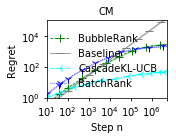

In [40]:
fig = plt.figure(figsize=(2.31, 1.8))
my_plot(user='CM', results=rt, legend=True, scale=10, result_type=0, extra_scale=1000)
plt.show()

In [7]:
for user in ['DCM', 'CM', 'PBM']: 
    print user
    rt = pickle.load(open('results/%d/' % iteration + user + str(n_top) + '.pkl'))
    for key in rt.keys():
        print key, rt[key]['weak Violation'][0][9], rt[key]['weak Violation'][1][9]

DCM
BubbleRank 0.0 0.0
BaselineRank 0.0 0.0
CascadeKL-UCB 23.33125 0.9035029215762805
MergeRank 71.8825 0.9188979090124761
CM
BubbleRank 0.0 0.0
BaselineRank 0.0 0.0
CascadeKL-UCB 24.12324649298597 0.7551573412681672
MergeRank 83.00801603206413 0.5608107637052291
PBM
BubbleRank 0.0 0.0
BaselineRank 0.0 0.0
CascadeKL-UCB 23.628256513026052 0.9609218871352354
MergeRank 59.62725450901804 0.98080958421579


In [182]:

data_name= 'DCM'
iters =5000000
QUERY = os.listdir('results/%d/'%iters +data_name+'5/KLUCB')
if '.DS_Store' in QUERY:
    QUERY.pop(QUERY.index('.DS_Store'))
rt = my_load_all(data_name, n_top=5, iteration=iters, scale=10)


In [188]:
rt['BaselineRank']['regret'][1]

array([2.50000000e-01, 5.00000000e-01, 1.87500000e-01, ...,
       5.62817719e+09, 5.62813913e+09, 5.62810217e+09])

In [ ]:
result_type = [(0, 'Regret'), (1, 'nDCG'), (3, 'Violation')]
for rt_idx, rt_item in result_type:
    fig = plt.figure(figsize=(2.3, 1.8))
    my_plot(user=data_name, results=rt, legend=False, scale=10, result_type=rt_idx)
    plt.title(data_name)
    plt.ylabel(rt_item)
    plt.xlim([10, int(1e6)])
    if rt_item == 'nDCG':
        plt.yscale('linear')
        plt.ylim([0.5, 1.05])
    plt.tight_layout(pad=0.2)
    plt.show()
    fig.savefig('tmpfigures/'+data_name+rt_item+'.pdf', dpi=1200, bbox_inches=0)

BaselineRank r@T:  18470.233333333334 std:  2038.5609994461688
BubbleRank r@T:  1427.1166666666666 std:  99.07798470907825
CascadeKL-UCB r@T:  16.694444444444443 std:  1.7484225204491386
MergeRank r@T:  1382.4833333333333 std:  56.23593732307605


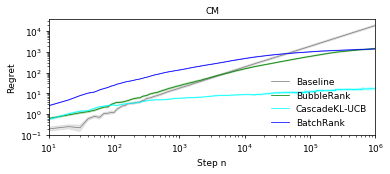

BaselineRank r@T:  0.9335374059632686 std:  0.006790377949277944
BubbleRank r@T:  0.9989027239202426 std:  0.00012147345793537725
CascadeKL-UCB r@T:  0.9999968864795091 std:  1.2221389519394814e-06
MergeRank r@T:  0.9995526582669488 std:  7.498571103816812e-05


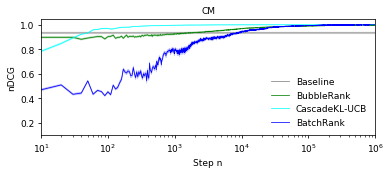

BaselineRank r@T:  0.0 std:  0.0
BubbleRank r@T:  0.0 std:  0.0
CascadeKL-UCB r@T:  41.022222222222446 std:  10.41369574094187
MergeRank r@T:  16381.638888889427 std:  2896.691810718172


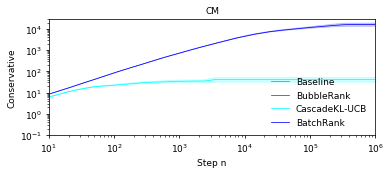

In [255]:
result_type = [(0, 'Regret'), (1, 'nDCG'), (3, 'Conservative')]
for rt_idx, rt_item in result_type:
    fig = plt.figure(figsize=(5.5, 2.5))
    my_plot(user=data_name, results=rt, legend=True, scale=10, result_type=rt_idx)
    plt.title(data_name)
    plt.ylabel(rt_item)
    if rt_item == 'nDCG':
        plt.yscale('linear')
    plt.tight_layout()
    plt.show()
    fig.savefig('tmpfigures/'+data_name+rt_item+'.png', dpi=1200, bbox_inches=0)

# Results of  CascadeKL-UCB in the first 1000 steps. 

User:CM
---------------
CascadeKL-UCB r@T:  5.37 std:  0.07140798274702932
User:PBM
---------------
CascadeKL-UCB r@T:  34.348 std:  0.6454307832757903


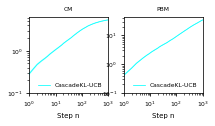

In [37]:
fig = plt.figure(figsize=(6.5, 1.4))
nn = 1
for user in USER:
    print 'User:' + user + '\n---------------'
    # load data        
    results = my_load(user, 5, 'q82523', 1000)
    plt.subplot(1,4,nn)
    nn+=1
    fig1 = my_plot(user, results, True)
    plt.title(user)
plt.show()


In [5]:
QUERY = os.listdir('results/10020000/CM5/KLUCB')
if '.DS_Store' in QUERY:
    QUERY.pop(QUERY.index('.DS_Store'))
for user in ['CM', 'PBM']:
#     results = my_load(user, 5, 'q82523')
    results = my_load_all(user, 5, 10020000)
    key = 'InitialPolicy'
    mean_tmp = np.zeros(results[key][0][1].shape[0]+1)
    mean_tmp[1:] = np.mean([item[1] for item in results[key]], axis=0)

    std_tmp = np.zeros(results[key][0][1].shape[0]+1)
    std_tmp[1:] = np.std([item[1] for item in results[key]], axis=0)/np.sqrt(len(results[key]))
    print user 
    print '1k: ', mean_tmp[1], std_tmp[1]
    print '5M: ', mean_tmp[5001], std_tmp[5001]
    print '10M: ', mean_tmp[-1], std_tmp[-1]

CM
1k:  6.015105740181269 0.15638526359292793
5M:  378.384310039971 65.64032952342578
10M:  748.1316990059677 131.50572933053186
PBM
1k:  44.05548387096774 1.273631800512809
5M:  45914.764081355446 2335.10170794045
10M:  91725.94462913772 4668.539198399084


In [33]:
n_top=5
fig = plt.figure(figsize=(5.5, 1.5))
nn=1
print '@ top' + str(n_top) 

plt.subplot(1,2,1)
nn+=1
fig1 = my_plot('CM', results1, False)
# plt.title('In ' + user + ' @'+str(n_top))
plt.title('CM')
plt.subplot(1,2,2)

fig1 = my_plot('PBM', results2, False)
plt.title('PBM')

plt.tight_layout(pad=0.2)
# plt.savefig('figures/'+'regrets-all-curves.pdf', dpi=1200, bbox_inches=0)
# plt.savefig('figures/'+'regrets-all-curves', dpi=1200, bbox_inches=0)
3plt.show()

@ top5


NameError: name 'results1' is not defined

# The following scripts are for the rebuttal

In [40]:
def my_load_all2(user, n_top, iteration=10020000):
    results = {}            
    for q in QUERY:
        dir_name = 'results/%d/'%iteration + user+str(n_top) + '/KLUCB/' + q + '/'
        dirs = os.listdir(dir_name)
        for d in dirs:
            if  d == 'InitialPolicy' or d=='CombineRankerFreq':
                if d not in results.keys():
                    results[d] = []
            else:
                continue
            methods_name = os.listdir(dir_name + d)
            for mn in methods_name:
                if mn == 'DS_Store':
                    continue
                d_name = float(mn.split('-')[0])

                if d == 'CombineRankerFreq' or d == 'InitialPolicy':
                    rt_tmp = np.load(dir_name + d + '/' + mn)
                    results[d].append([d_name, rt_tmp[20:] - rt_tmp[19]])
                
    return results

def my_plot2(user, results, legend=False):
    # plot curves
    # fig = plt.figure(figsize=(2.75, 1.5))

    # keys = ['BubbleRank', 'BatchRank', 'CombineRanker', 'CascadingKL-UCB']
    keys = results.keys()
    d_plot = []
    std_plot = []
    std_min = []
    std_max = []

    for key in results.keys():
        mean_tmp = np.zeros(results[key][0][1].shape[0]+1)
        mean_tmp[1:] = np.mean([item[1] for item in results[key]], axis=0)
        d_plot.append(mean_tmp)

        std_tmp = np.zeros(results[key][0][1].shape[0]+1)
        std_tmp[1:] = np.std([item[1] for item in results[key]], axis=0)/np.sqrt(len(results[key]))
        std_plot.append(std_tmp)
        std_min_tmp = np.zeros(results[key][0][1].shape[0]+1)
        std_min_tmp[1:] = np.min([item[1] for item in results[key]], axis=0) 
        std_min.append(std_min_tmp)

        std_max_tmp = np.zeros(results[key][0][1].shape[0]+1)
        std_max_tmp[1:] = np.max([item[1] for item in results[key]], axis=0) 
        std_max.append(std_max_tmp)
        print key, 'r@T: ', mean_tmp[-1], 'std: ', std_tmp[-1]
    x = np.arange(d_plot[0].shape[0]) * 1000
    [plt.plot(x, d_plot[p_idx], color=color_map[keys[p_idx]]) for p_idx in range(len(d_plot))]
    [plt.fill_between(x, d_plot[p_idx] - std_plot[p_idx], d_plot[p_idx] + std_plot[p_idx], alpha=0.2, color=color_map[keys[p_idx]]) for p_idx in range(len(d_plot))]
    # [plt.fill_between(x, std_min[p_idx], std_max[p_idx], alpha=0.2) for p_idx in range(len(d_plot))]
    # [plt.errorbar(x[::100], d_plot[p_idx][::100], xerr=0.0, yerr=std_plot[p_idx][::100]) for p_idx in range(len(d_plot))]
    plt.xlabel('Step n')
    axes = plt.gca()
    plt.xscale('log')
    plt.yscale('log')
    axes.set_xlim([1e3, 1e7])
    axes.set_ylim(ymin=1)
    axes.tick_params(axis='y', which='minor', left='on')
    if user == 'CM':
        plt.yticks([1, 10, 100, 1000, 10000])
        plt.ylabel('Regret')
        if legend:
            plt.legend([name_map[key] for key in keys], loc='upper left', bbox_to_anchor=(0.0, 1.0), framealpha=0.0)
    else:
        axes.set_ylim(ymin=10)
        plt.yticks([10, 100, 1000, 10000, 100000])
    return 0


In [38]:
QUERY = os.listdir('results/10020000/CM5/KLUCB')
if '.DS_Store' in QUERY:
    QUERY.pop(QUERY.index('.DS_Store'))
n_top=5
resultsCM = my_load_all('CM', n_top, 1000)
resultsPBM = my_load_all('PBM', n_top, 1000)

In [45]:
rm = resultsCM 
rp = resultsPBM

In [52]:
rm.keys()

['BubbleRank', 'CascadeKL-UCB', 'MergeRank']

In [55]:
resultsCM = {}
resultsPBM = {}
resultsCM['CascadeKL-UCB'] = rm['CascadeKL-UCB']
resultsPBM['CascadeKL-UCB'] = rp['CascadeKL-UCB']

@ top5
User:CM
---------------
InitialPolicy r@T:  739.6427064732945 std:  131.75822014158365
CombineRankerFreq r@T:  541.4633333333334 std:  32.93091257944146
User:PBM
---------------
InitialPolicy r@T:  91640.68923341099 std:  4667.813022637283
CombineRankerFreq r@T:  4408.661666666667 std:  217.96732129125292
CascadeKL-UCB r@T:  6.145610169491525 std:  0.017058394251245414
CascadeKL-UCB r@T:  46.552754716981134 std:  0.15611996703639316


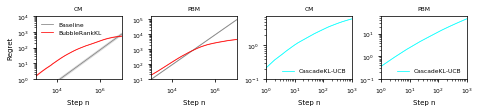

In [57]:
QUERY = os.listdir('results/10020000/CM5/KLUCB')
if '.DS_Store' in QUERY:
    QUERY.pop(QUERY.index('.DS_Store'))
n_top=5
fig = plt.figure(figsize=(6.5, 1.4))
nn=1
print '@ top' + str(n_top) 

for user in USER:
    print 'User:' + user + '\n---------------'
    # load data        
    results = my_load_all2(user, n_top, 10020000)
    # plot
    plt.subplot(1,4,nn)
    nn+=1
    fig1 = my_plot2(user, results, True)
    # plt.title('In ' + user + ' @'+str(n_top))
    plt.title(user)

# for user in USER:
#     print 'User:' + user + '\n---------------'
#     # load data        
#     results = my_load_all(user, n_top, 1000)
#     plt.subplot(1,4,nn)
#     nn+=1
#     fig1 = my_plot(user, results, True)
#     plt.title(user)
plt.subplot(1,4,nn)
nn+=1
fig1 = my_plot('CM', resultsCM, True)
plt.title('CM')
plt.subplot(1,4,nn)
nn+=1
fig1 = my_plot('PBM', resultsPBM, True)
plt.title('PBM')
    
plt.tight_layout(pad=0.2)
plt.savefig('figures/'+'regrets-rebuttal.pdf', dpi=1200, bbox_inches=0)
plt.savefig('figures/'+'regrets-rebuttal', dpi=1200, bbox_inches=0)

plt.show()

In [22]:
x = np.arange(10)
y = [x *(1+i+np.random.rand(10)) for i in range(10)]
s = np.std(y, axis=0)

In [20]:
 plt.errorbar(step[sube], np.mean(cumreg[sube, :], axis = 1), \
        np.std(cumreg[sube, :], axis = 1) / np.sqrt(cumreg.shape[1]), \
        fmt = "none", ecolor = "b")

(10,)

In [266]:
np.arange(1, results_shape+1)

array([     1,      2,      3, ...,  99998,  99999, 100000])

In [2]:
a= pickle.load(open('results/nonstationary/100000/100/CM5.pkl'))